In [1]:
import torch
from torchvision import datasets, transforms
import jax.numpy as jnp
from matplotlib import pyplot as plt
import numpy as np
from aggregate_jax import jax_scan_aggregate  # Assuming this function is imported correctly

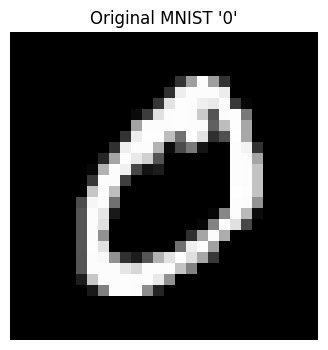

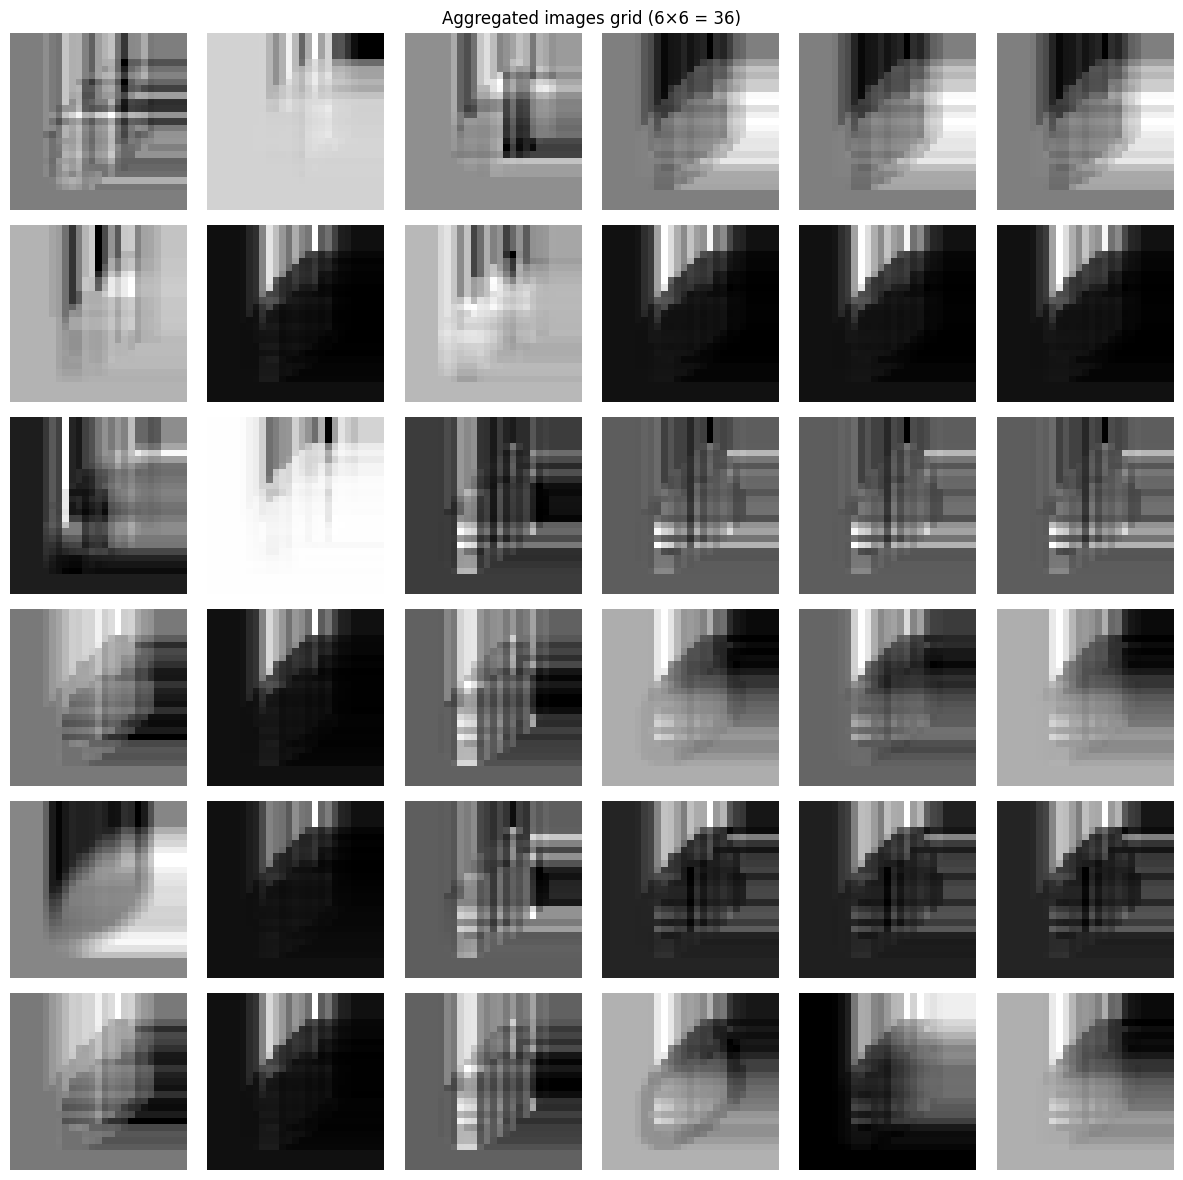

In [2]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Load MNIST and pick one '0' sample
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
image, label = mnist_data[1]
zero_np = np.array(image).squeeze()         # (28, 28)
zero_jax = jnp.expand_dims(jnp.array(zero_np), 0)  # (1, 28, 28)

# Define dims and parameters
n, p, q = 3, 3, 3
# np_dim = n + p, nq_dim = n + q
def get_dims(n, p, q):
    return n + p, n + q
np_dim, nq_dim = get_dims(n, p, q)

params = {
    'a': jnp.ones((n,)),
    'b': jnp.ones((n,)),
    'b_prime': jnp.ones((n,)),
    'c': jnp.ones((n,)),
    'c_prime': jnp.ones((n,)),
    'd': jnp.ones((n,)),
    'd_prime': jnp.zeros((n,)),
    'e': jnp.ones((q,))
}

# Run aggregation
agg_tuple = jax_scan_aggregate(n, p, q, zero_jax, params)
agg_map = agg_tuple[-1]  # shape: (rows, cols, batch_size, np_dim, nq_dim)
rows, cols = agg_map.shape[0], agg_map.shape[1]

# Extract and store each aggregated image
aggregated_images = []
for i in range(np_dim):
    for j in range(nq_dim):
        img = np.array(agg_map[:, :, 0, i, j])
        aggregated_images.append(img)

# Plot original MNIST '0'
plt.figure(figsize=(4, 4))
plt.imshow(zero_np, cmap='gray')
plt.title("Original MNIST '0'")
plt.axis('off')
plt.show()

# Plot all np_dim x nq_dim aggregated results in a grid
fig, axes = plt.subplots(np_dim, nq_dim, figsize=(12, 12))
for idx, ax in enumerate(axes.flatten()):
    ax.imshow(aggregated_images[idx], cmap='gray')
    ax.axis('off')
plt.suptitle(f"Aggregated images grid ({np_dim}×{nq_dim} = {np_dim*nq_dim})")
plt.tight_layout()
plt.show()
